<a href="https://colab.research.google.com/github/cauengel/Gurobi/blob/master/Gurobi_Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Six Life Lessons You Didn't Learn from your OR Program

<font size=5>
"We'll bring a CS and Business element"

  </font>




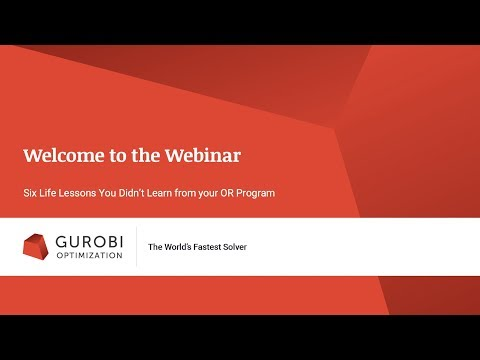

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('yWZ-2Zec1bc') 

You can download the materials associated with this webinar [here](http://www.gurobi.com/pdfs/webinars/gurobi_6_lessons_opex.pdf).

*All rights belong to Gurobi*

# Interfaces

---

![alt text](https://i.ibb.co/DWfXn0r/img2.png)

# Input Data

---

![alt text](https://i.ibb.co/3p4dmF3/img3.png)

# Parameters

---

![alt text](https://i.ibb.co/10G0b77/img4.png)

# Output

---

![alt text](https://i.ibb.co/SvFHgBw/img5.png)

# Simplicity / Clean Design

---

![alt text](https://i.ibb.co/RYjXVkc/img7.png)

## "If You're Not Embarrassed By The First Version Of Your Product, You’ve Launched Too Late" - Reid Hoffman


![alt text](https://i.ibb.co/ykZb08L/img8.png)

# **Lesson #1 Don't Let Users Get Themselves in Trouble**
### Their trouble becomes your trouble

# Example: Parameter X (1/2)

---

![alt text](https://i.ibb.co/Db7t898/img11.png)

# Example: Parameter X (2/2)

---

![alt text](https://i.ibb.co/X3ywrnB/img30.png)

![alt text](https://i.ibb.co/DGJGtgt/img13.png)

# **Lesson #2 Be Prepared (Not Proactive) to Become Fast**

# Pareto

---

![alt text](https://i.ibb.co/fDs0YNv/img16.png)

![alt text](https://i.ibb.co/BcSwS9h/img17.png)

# **Lesson #3 Be Preactive with Bugs**

![alt text](https://i.ibb.co/Y80sCTn/img21.png)

# **Lesson #4 Be Paranoid About Solver Failures**
### Users hate infeasibility but they appreciate insights

# Be Proactive and Be Prepared

---

![alt text](https://i.ibb.co/7Kkk1VH/img23.png)

# Data Cleansing

---

![alt text](https://i.ibb.co/Bc7YDTP/img24.png)

# Infeasibility

---

![alt text](https://i.ibb.co/1vwbVrs/img25.png)

# **Lesson #5 You Will Be Swimming in Data**

![alt text](https://i.ibb.co/1LTKDMV/img27.png)

# **Lesson #6 Take advantage of modern tools and don't be afraid to migrate to new ones**

# The Right Tools

---

![alt text](https://i.ibb.co/54M9pKj/img29.png)

In [0]:
!wget -q https://anaconda.org/Gurobi/gurobi/8.1.1/download/linux-64/gurobi-8.1.1-py36_0.tar.bz2
!tar xjf gurobi-8.1.1-py36_0.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!cp -r lib/libgurobi81.so /usr/local/lib/

In [0]:
import math
import random
from gurobipy import *

In [0]:
# Callback - use lazy constraints to eliminate sub-tours

def subtourelim(model, where):
  if where == GRB.callback.MIPSOL:
    selected = []
    # make a list of edges selected in the solution
    for i in range(n):
      sol = model.cbGetSolution([model._vars[i,j] for j in range(n)])
      selected += [(i,j) for j in range(n) if sol[j] > 0.5]
    # find the shortest cycle in the selected edge list
    tour = subtour(selected)
    if len(tour) < n:
      # add a subtour elimination constraint
      expr = 0
      for i in range(len(tour)):
        for j in range(i+1, len(tour)):
          expr += model._vars[tour[i], tour[j]]
      model.cbLazy(expr <= len(tour)-1)

In [0]:
# Euclidean distance between two points

def distance(points, i, j):
  dx = points[i][0] - points[j][0]
  dy = points[i][1] - points[j][1]
  return math.sqrt(dx*dx + dy*dy)

In [0]:
# Given a list of edges, finds the shortest subtour

def subtour(edges):
  visited = [False]*n
  cycles = []
  lengths = []
  selected = [[] for i in range(n)]
  for x,y in edges:
    selected[x].append(y)
  while True:
    current = visited.index(False)
    thiscycle = [current]
    while True:
      visited[current] = True
      neighbors = [x for x in selected[current] if not visited[x]]
      if len(neighbors) == 0:
        break
      current = neighbors[0]
      thiscycle.append(current)
    cycles.append(thiscycle)
    lengths.append(len(thiscycle))
    if sum(lengths) == n:
      break
  return cycles[lengths.index(min(lengths))]

n = 50

In [0]:
# Create n random points

random.seed(1)
points = []
for i in range(n):
  points.append((random.randint(0,100),random.randint(0,100)))

In [0]:
m = Model()

# Create variables

vars = {}
for i in range(n):
   for j in range(i+1):
     vars[i,j] = m.addVar(obj=distance(points, i, j), vtype=GRB.BINARY,
                          name='e'+str(i)+'_'+str(j))
     vars[j,i] = vars[i,j]
   m.update()

Academic license - for non-commercial use only


In [0]:
# Add degree-2 constraint, and forbid loops

for i in range(n):
  m.addConstr(quicksum(vars[i,j] for j in range(n)) == 2)
  vars[i,i].ub = 0

m.update()

In [0]:
# Optimize model

m._vars = vars
m.params.LazyConstraints = 1
m.optimize(subtourelim)

solution = m.getAttr('x', vars)
selected = [(i,j) for i in range(n) for j in range(n) if solution[i,j] > 0.5]
assert len(subtour(selected)) == n

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 50 rows, 1275 columns and 2500 nonzeros
Variable types: 0 continuous, 1275 integer (1275 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 2775.3416544
Presolve removed 0 rows and 50 columns
Presolve time: 0.00s
Presolved: 50 rows, 1225 columns, 2450 nonzeros
Variable types: 0 continuous, 1225 integer (1225 binary)

Root relaxation: objective 5.981996e+02, 71 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  598.19961    0    6 2775.34165  598.19961  78.4%     -    0s
H    0     0                     784.5828097  598.19961  23.8%     -    0s
     0     0  626.69891    0    6  784.58281  62

# The Traveling Salesman Problem  [TSP Interactive](http://examples.gurobi.com/traveling-salesman-problem)